# Exercise 14

## Predict rating using LSTM

### Maxwell Calderon Coy . 201920519
### Sergio Ardila Rodríguez 201924139
### Jhon Alex Hernandez 200950288
### Alexander Camargo García 2009325


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
import multiprocessing

In [ ]:
dataTraining = pd.read_csv('https://github.com/albahnsen/AdvancedMethodsDataAnalysisClass/raw/master/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [ ]:
dataTraining.head()

,year,title,plot,genres,rating
3107,2003,Most,most is the story of a single father who takes...,"['Short', 'Drama']",8.0
900,2008,How to Be a Serial Killer,a serial killer decides to teach the secrets o...,"['Comedy', 'Crime', 'Horror']",5.6
6724,1941,A Woman's Face,"in sweden , a female blackmailer with a disfi...","['Drama', 'Film-Noir', 'Thriller']",7.2
4704,1954,Executive Suite,"in a friday afternoon in new york , the presi...",['Drama'],7.4
2582,1990,Narrow Margin,"in los angeles , the editor of a publishing h...","['Action', 'Crime', 'Thriller']",6.6


In [ ]:
plots = dataTraining['plot']
plots = plots.str.replace('[^\w\s!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n]','')
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [ ]:
y.head(10)

3107    1
900     0
6724    1
4704    1
2582    1
9784    1
8804    0
3501    1
7145    1
4067    1
Name: rating, dtype: int64

# Exercise 14.1

- Remove stopwords 
- Lowercase
- split the text in words 
- pad_sequences

In [ ]:
X = plots.tolist()

In [ ]:
X[:5]

['most is the story of a single father who takes his eight year - old son to work with him at the railroad drawbridge where he is the bridge tender .  a day before ,  the boy meets a woman boarding a train ,  a drug abuser .  at the bridge ,  the father goes into the engine room ,  and tells his son to stay at the edge of the nearby lake .  a ship comes ,  and the bridge is lifted .  though it is supposed to arrive an hour later ,  the train happens to arrive .  the son sees this ,  and tries to warn his father ,  who is not able to see this .  just as the oncoming train approaches ,  his son falls into the drawbridge gear works while attempting to lower the bridge ,  leaving the father with a horrific choice .  the father then lowers the bridge ,  the gears crushing the boy .  the people in the train are completely oblivious to the fact a boy died trying to save them ,  other than the drug addict woman ,  who happened to look out her train window .  the movie ends ,  with the man wand

In [ ]:
#Listado de todas las diferentes palabras
voc = set(''.join(X).split())

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
en_stops = set(stopwords.words('english'))

new_words = [word for word in voc if word not in en_stops]

In [ ]:
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [ ]:
vocabulary = {x: idx + 1 for idx, x in enumerate(set(new_words))}

max_url_len = 380
X = [x[:max_url_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary ] for x in X]

In [ ]:
X_pad = sequence.pad_sequences(X, maxlen=max_url_len)

In [ ]:
y_pad = np.array(y)

In [ ]:
X_pad.shape

(7895, 380)

# Exercise 14.2

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_pad, test_size=0.33, random_state=42)

In [ ]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [ ]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_url_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 380, 128)          5226368   
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 5,247,009
Trainable params: 5,247,009
Non-trainable params: 0
_________________________________________________________________


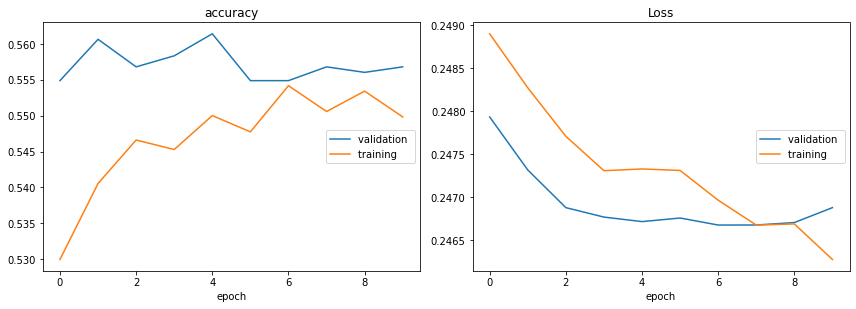

accuracy
	validation       	 (min:    0.555, max:    0.561, cur:    0.557)
	training         	 (min:    0.530, max:    0.554, cur:    0.550)
Loss
	validation       	 (min:    0.247, max:    0.248, cur:    0.247)
	training         	 (min:    0.246, max:    0.249, cur:    0.246)


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), 
          batch_size=128, epochs=10,
          callbacks=[PlotLossesKeras()])

In [ ]:
y_pred = model.predict_classes(X_test)[:,0]

print((y_pred == y_test).mean())

0.556792018419033
